# Pre-processing

In [1]:
from kiva_data import KivaData

In [22]:
load_data = KivaData(use_sample=True).loan_data


In [23]:
df.describe()

,Unnamed: 0,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,10000.000000,1.000000e+04,10000.000000,10000.000000,9799.000000,10000.000000,10000.00000
mean,336241.032300,9.939046e+05,777.205500,827.697500,178.780794,13.817300,20.58650
std,194016.646357,1.968474e+05,1045.109963,1085.719941,95.018000,8.849901,26.54376
min,7.000000,6.530780e+05,0.000000,25.000000,9.000000,2.000000,0.00000
25%,167926.500000,8.234395e+05,250.000000,275.000000,126.000000,8.000000,7.00000
50%,338895.500000,9.957810e+05,450.000000,500.000000,145.000000,13.000000,13.00000
75%,502303.000000,1.162591e+06,900.000000,1000.000000,204.000000,14.000000,25.00000
max,671142.000000,1.339765e+06,35000.000000,35000.000000,533.000000,144.000000,1067.00000


In [24]:
df.head()

,Unnamed: 0,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,gender
6883,264956,912251,575.0,975.0,Grocery Store,Food,"to buy more products such as meats, sausages, ...",HN,Honduras,"La Flecha, Santa Barbara",...,2015-07-02 16:54:00,2015-06-12 07:00:00,NaT,20.0,19,"user_favorite, #Single, #Supporting Family",male,monthly,2015-07-02,male
2531,541293,1201897,1000.0,1000.0,General Store,Retail,"to buy rice, sugar, oil, detergent, and other ...",EC,Ecuador,Jaramijo,...,2016-12-10 19:30:21,2016-11-24 08:00:00,2016-12-21 18:34:41,8.0,26,NaN,female,irregular,2016-12-10,female
5531,51283,703673,275.0,1275.0,Shoe Sales,Retail,to buy shoes.,TG,Togo,Hédzranawoé,...,2014-04-28 15:10:26,2014-04-25 07:00:00,NaT,14.0,10,"#Repeat Borrower, #Supporting Family, #Tourism",male,monthly,2014-04-28,male
2007,366592,1013657,1200.0,1200.0,Agriculture,Agriculture,to pay rent for a threshing machine and a grin...,SV,El Salvador,Anamoros,...,2016-01-25 20:38:35,2016-01-11 08:00:00,2016-02-25 21:34:35,20.0,37,"#Parent, #Job Creator",male,monthly,2016-01-25,male
474,231058,878708,650.0,650.0,Higher education costs,Education,to pay higher education costs.,TJ,Tajikistan,Khujand,...,2015-04-30 11:42:25,2015-04-24 07:00:00,2015-05-06 12:43:05,14.0,25,"#Schooling, #Female Education, #Single, user_f...",female,monthly,2015-04-30,female


In [25]:
len(df['borrower_genders'].unique())

411

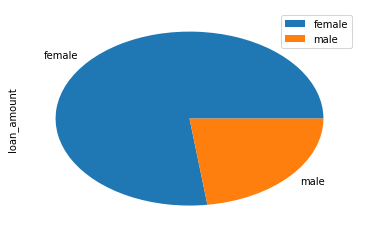

In [26]:
import matplotlib.pyplot as plt
df.groupby('gender').agg('count')[['loan_amount']].plot.pie(y='loan_amount')
plt.show()

In [27]:
df.repayment_interval.unique()

array(['monthly', 'irregular', 'bullet', 'weekly'], dtype=object)

In [28]:
df.describe()

,Unnamed: 0,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,10000.000000,1.000000e+04,10000.000000,10000.000000,9799.000000,10000.000000,10000.00000
mean,336241.032300,9.939046e+05,777.205500,827.697500,178.780794,13.817300,20.58650
std,194016.646357,1.968474e+05,1045.109963,1085.719941,95.018000,8.849901,26.54376
min,7.000000,6.530780e+05,0.000000,25.000000,9.000000,2.000000,0.00000
25%,167926.500000,8.234395e+05,250.000000,275.000000,126.000000,8.000000,7.00000
50%,338895.500000,9.957810e+05,450.000000,500.000000,145.000000,13.000000,13.00000
75%,502303.000000,1.162591e+06,900.000000,1000.000000,204.000000,14.000000,25.00000
max,671142.000000,1.339765e+06,35000.000000,35000.000000,533.000000,144.000000,1067.00000


In [29]:
df.columns

Index(['Unnamed: 0', 'id', 'funded_amount', 'loan_amount', 'activity',
       'sector', 'use', 'country_code', 'country', 'region', 'currency',
       'partner_id', 'posted_time', 'disbursed_time', 'funded_time',
       'term_in_months', 'lender_count', 'tags', 'borrower_genders',
       'repayment_interval', 'date', 'gender'],
      dtype='object')

In [30]:
df[['activity', 'sector', 'use', 'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time','tags', 'borrower_genders', 'repayment_interval',
       'date', 'gender']].agg(['min', 'max', 'count', lambda x: len(x.unique())])

,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date,gender
<lambda>,151,15,8537.0,77,77,2161.0,62,239.0,9998,1336,9240,3200.0,411.0,4,1226,3.0
count,10000,10000,9931.0,10000,10000,9153.0,10000,9799.0,10000,9971,9286,7472.0,9932.0,10000,10000,9932.0
max,Wholesale,Wholesale,NaN,ZW,Zimbabwe,NaN,ZMW,533.0,2017-07-14 06:58:25,2017-09-28 07:00:00,2017-07-16 08:22:36,NaN,NaN,weekly,2017-07-14,NaN
min,Agriculture,Agriculture,NaN,AL,Albania,NaN,ALL,9.0,2014-01-01 11:46:01,2013-12-09 08:00:00,2014-01-01 16:37:28,NaN,NaN,bullet,2014-01-01,NaN


In [31]:
df.gender.value_counts()

female    7661
male      2271
Name: gender, dtype: int64

In [32]:
df.country.unique()

array(['Honduras', 'Ecuador', 'Togo', 'El Salvador', 'Tajikistan',
       'Paraguay', 'Uganda', 'Philippines', 'Egypt', 'Kenya', 'Cambodia',
       'Nicaragua', 'Indonesia', 'Tanzania', 'Bolivia', 'Peru',
       'Palestine', 'Ghana', 'Mexico', 'Armenia', 'Pakistan', 'Georgia',
       'India', 'Haiti', 'The Democratic Republic of the Congo',
       'Colombia', 'Samoa', 'Guatemala', 'Burundi', 'Nigeria', 'Zimbabwe',
       'Senegal', 'Mozambique', 'Kosovo', 'Iraq', 'Rwanda', 'Turkey',
       'Suriname', 'Lebanon', 'Vietnam', 'Kyrgyzstan', 'United States',
       'Liberia', 'Sierra Leone', 'Yemen', 'Myanmar (Burma)',
       "Lao People's Democratic Republic", 'Costa Rica', 'Jordan', 'Mali',
       'Israel', 'Mongolia', 'Timor-Leste', 'Lesotho', 'Burkina Faso',
       'Nepal', 'Azerbaijan', 'Cameroon', 'Zambia', 'Somalia', 'Albania',
       'Ukraine', 'South Africa', 'Madagascar', 'Malawi', 'China', 'Benin',
       'Dominican Republic', 'Solomon Islands', 'Moldova', 'Panama',
       'Brazi

In [33]:
df.country.value_counts()

Philippines                         2350
Kenya                               1136
El Salvador                          596
Cambodia                             531
Pakistan                             397
Colombia                             321
Peru                                 309
Uganda                               284
Tajikistan                           283
Ecuador                              205
India                                188
Paraguay                             176
Vietnam                              169
Nicaragua                            166
Bolivia                              154
Nigeria                              154
Armenia                              124
Palestine                            121
Lebanon                              115
Samoa                                108
Guatemala                            106
Indonesia                            104
Mali                                  95
Mexico                                93
United States   